<a href="https://colab.research.google.com/github/splopsky/ML-practice/blob/main/Logistic_Regression_LDA_QDA_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.6.1 The Stock Market Data

In [ ]:
#imports and setup
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('precision', 2) #number percision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) #get rid of scientific notation
plt.style.use('seaborn') # pretty matplotlib plots

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6lfS-RTm4MbKZRPmxGUsRR7FZwxL3WeIgavvVHbcIOPXVvgDosbtk
Mounted at /content/drive


In [ ]:
# Load data
smarket = pd.read_csv('/content/drive/MyDrive/datasets/Smarket.csv', index_col=0)
smarket.Direction = smarket.Direction.astype('category')
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
2,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
3,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
4,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
5,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up
1247,2005,0.04,0.42,0.25,-0.02,-0.58,1.29,-0.95,Down
1248,2005,-0.95,0.04,0.42,0.25,-0.02,1.54,0.13,Up
1249,2005,0.13,-0.95,0.04,0.42,0.25,1.42,-0.30,Down


In [ ]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [ ]:
smarket.shape

(1250, 9)

In [ ]:
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,"1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00",1250
unique,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,nan,nan,Up
freq,nan,nan,nan,nan,nan,nan,nan,nan,648
mean,"2,003.02",0.00,0.00,0.00,0.00,0.01,1.48,0.00,NaN
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14,NaN
min,"2,001.00",-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92,NaN
25%,"2,002.00",-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64,NaN
50%,"2,003.00",0.04,0.04,0.04,0.04,0.04,1.42,0.04,NaN
75%,"2,004.00",0.60,0.60,0.60,0.60,0.60,1.64,0.60,NaN


In [ ]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.3 KB


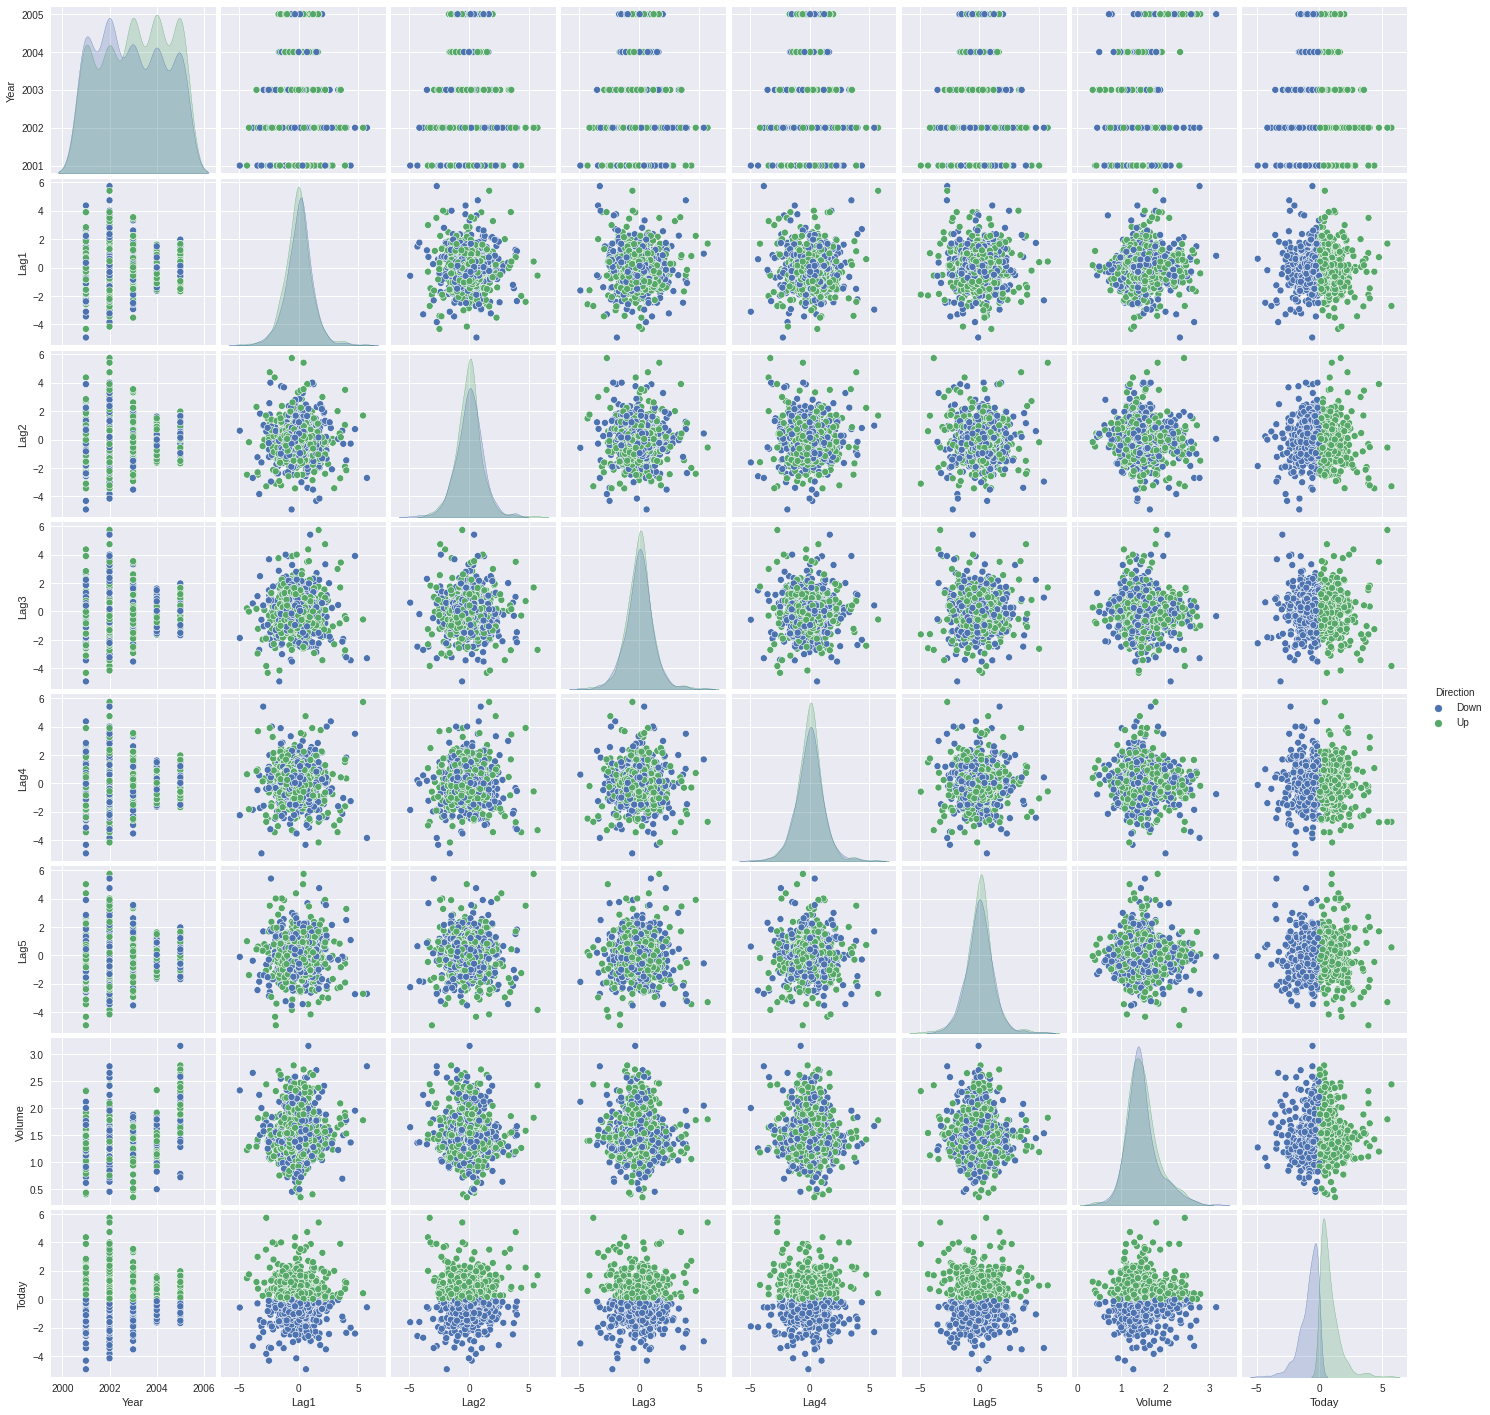

In [ ]:
sns.pairplot(smarket, hue='Direction')

In [ ]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,0.03,0.03,0.03,0.04,0.03,0.54,0.03
Lag1,0.03,1.00,-0.03,-0.01,-0.00,-0.01,0.04,-0.03
Lag2,0.03,-0.03,1.00,-0.03,-0.01,-0.00,-0.04,-0.01
Lag3,0.03,-0.01,-0.03,1.00,-0.02,-0.02,-0.04,-0.00
Lag4,0.04,-0.00,-0.01,-0.02,1.00,-0.03,-0.05,-0.01
Lag5,0.03,-0.01,-0.00,-0.02,-0.03,1.00,-0.02,-0.03
Volume,0.54,0.04,-0.04,-0.04,-0.05,-0.02,1.00,0.01
Today,0.03,-0.03,-0.01,-0.00,-0.01,-0.03,0.01,1.00


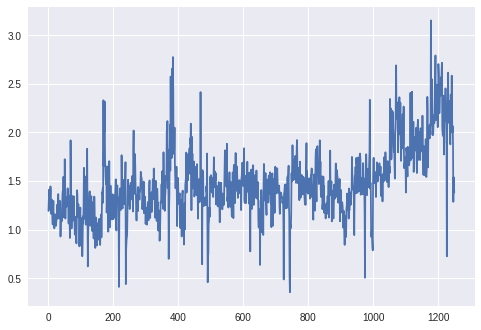

In [ ]:
plt.plot(smarket.Volume);

4.6.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X_sk = smarket.loc[:,'Lag1':'Volume']
y_sk = smarket.Direction

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit = glm_model.fit(X_sk, y_sk)

glm_fit.intercept_, glm_fit.coef_

(array([-0.12600781]),
 array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
          0.13544567]]))

predict probability that the market will go up

In [ ]:
#prediction summary
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:,0],
              'prob_1': glm_fit.predict_proba(X_sk)[:,1],
              'pred_class': glm_fit.predict(X_sk)},
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.52,0.48,Down
2,0.52,0.48,Down
3,0.48,0.52,Up
4,0.49,0.51,Up
...,...,...,...
1245,0.48,0.52,Up
1246,0.49,0.51,Up
1247,0.46,0.54,Up
1248,0.47,0.53,Up


confusion matrix

In [ ]:
from sklearn.metrics import  confusion_matrix, accuracy_score

# Labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error: ' + str(1 - accuracy_score(y_sk, glm_fit.predict(X_sk))))

Accuracy: 0.5216
Training Error: 0.47840000000000005


In [ ]:
# separate training and test sets
train = smarket.loc[smarket.Year < 2005]
smarket_2005 = smarket.loc[smarket.Year >= 2005]

X_sk_train = train.loc[:,'Lag1':'Volume']
y_sk_train = train.Direction

X_sk_test = smarket_2005.loc[:,'Lag1':'Volume']
y_sk_test = smarket_2005.Direction
glm_model_t = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t = glm_model.fit(X_sk_train, y_sk_train)

#prediction summary
pd.DataFrame({'prob_0': glm_fit_t.predict_proba(X_sk_test)[:,0],
              'prob_1': glm_fit_t.predict_proba(X_sk_test)[:,1],
              'pred_class': glm_fit_t.predict(X_sk_test)},
             columns=['prob_0','prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.47,0.53,Up
1,0.48,0.52,Up
2,0.48,0.52,Up
3,0.49,0.51,Up
4,0.50,0.50,Down
...,...,...,...
247,0.52,0.48,Down
248,0.49,0.51,Up
249,0.48,0.52,Up
250,0.48,0.52,Up


In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test, glm_fit.predict(X_sk_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,77,34
1,97,44


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))
print('Training Error: ' + str(1 - accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))

Accuracy: 0.4801587301587302
Training Error: 0.5198412698412698


In [ ]:
X_sk_train_s = train.loc[:,'Lag1':'Lag2']
y_sk_train_s = train.Direction

X_sk_test_s = smarket_2005.loc[:,'Lag1':'Lag2']
y_sk_test_s = smarket_2005.Direction

glm_model_t_s = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t_s = glm_model.fit(X_sk_train_s, y_sk_train_s)

#prediction summary
pd.DataFrame({'prob_0': glm_fit_t.predict_proba(X_sk_test_s)[:,0],
              'prob_1': glm_fit_t.predict_proba(X_sk_test_s)[:,1],
              'pred_class': glm_fit_t.predict(X_sk_test_s)},
             columns=['prob_0','prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.48,0.52,Up
2,0.47,0.53,Up
3,0.47,0.53,Up
4,0.49,0.51,Up
...,...,...,...
247,0.50,0.50,Down
248,0.50,0.50,Up
249,0.48,0.52,Up
250,0.48,0.52,Up


In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test_s, glm_fit.predict(X_sk_test_s)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))
print('Training Error: ' + str(1 - accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))

Accuracy: 0.5595238095238095
Training Error: 0.44047619047619047


predictions for arbitrary data


In [ ]:
# predictions for arbitrary data

predict_data = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})
glm_fit.predict_proba(predict_data)[:, 1]

array([0.47914604, 0.49611109])

4.6.3 Linear Discriminant Analysis


Using scikit-learn:LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

LDA training

In [ ]:
lda_fit.priors_ # group priors

array([0.49198397, 0.50801603])

In [ ]:
lda_fit.means_ #group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
lda_fit.scalings_ #coefficients od Ld

array([[-0.64201904],
       [-0.51352928]])

Plotting LDA

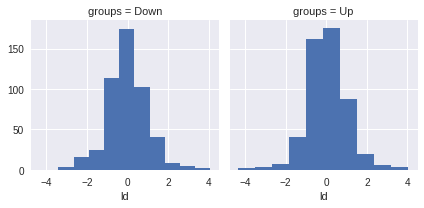

In [ ]:
# for plotting Lda, needs improvement
ld_sc = X_train.iloc[:,0] * lda_fit.scalings_[0] + X_train.iloc[:,1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');

LDA training results

In [ ]:
#prediction summary
pd.DataFrame({'prob_0': lda_fit.predict_proba(X_test)[:,0],
              'prob_1': lda_fit.predict_proba(X_test)[:,1],
              'pred_class': lda_fit.predict(X_test)},
             columns=['prob_0','prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.48,0.52,Up
2,0.47,0.53,Up
3,0.47,0.53,Up
4,0.49,0.51,Up
...,...,...,...
247,0.50,0.50,Down
248,0.50,0.50,Up
249,0.48,0.52,Up
250,0.48,0.52,Up


In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_test, glm_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_sk_test_s, lda_fit.predict(X_test))))
print('Training Error: ' + str(1 - accuracy_score(y_sk_test_s, lda_fit.predict(X_test))))

Accuracy: 0.5595238095238095
Training Error: 0.44047619047619047


4.6.4 Quadric Discriminant Analysis

Using scikit-learn

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

QDA trainig

In [ ]:
qda_fit.priors_ # group priors

array([0.49198397, 0.50801603])

In [ ]:
qda_fit.means_ #group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
qda_fit.scalings_ #coefficients of Qd

[array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]

QDA training results

In [ ]:
#prediction summary
pd.DataFrame({'prob_0': qda_fit.predict_proba(X_test)[:,0],
              'prob_1': qda_fit.predict_proba(X_test)[:,1],
              'pred_class': qda_fit.predict(X_test)},
             columns=['prob_0','prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.48,0.52,Up
2,0.46,0.54,Up
3,0.47,0.53,Up
4,0.49,0.51,Up
...,...,...,...
247,0.50,0.50,Up
248,0.49,0.51,Up
249,0.48,0.52,Up
250,0.48,0.52,Up


In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,30,81
1,20,121


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Training Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 0.5992063492063492
Training Error: 0.4007936507936508


4.6.5 K-Nearest Neighbors

Using scikit-learn: KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_model.fit(X_train, y_train)

KNN training results

In [ ]:
#prediction summary
pd.DataFrame({'prob_0': knn_fit.predict_proba(X_test)[:,0],
              'prob_1': knn_fit.predict_proba(X_test)[:,1],
              'pred_class': knn_fit.predict(X_test)},
             columns=['prob_0','prob_1','pred_class'])

,prob_0,prob_1,pred_class
0,0.00,1.00,Up
1,1.00,0.00,Down
2,0.00,1.00,Up
3,0.00,1.00,Up
4,0.00,1.00,Up
...,...,...,...
247,1.00,0.00,Down
248,1.00,0.00,Down
249,0.00,1.00,Up
250,1.00,0.00,Down


In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,43,68
1,58,83


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Training Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.5
Training Error: 0.5


KNN: k=3

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_fit_3 = knn_model.fit(X_train, y_train)

In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit_3.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,48,63
1,55,86


In [ ]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit_3.predict(X_test))))
print('Training Error: ' + str(1 - accuracy_score(y_test, knn_fit_3.predict(X_test))))

Accuracy: 0.5317460317460317
Training Error: 0.46825396825396826
